In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')
titanic_data= pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
print(titanic_data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9

<Axes: xlabel='Survived', ylabel='count'>

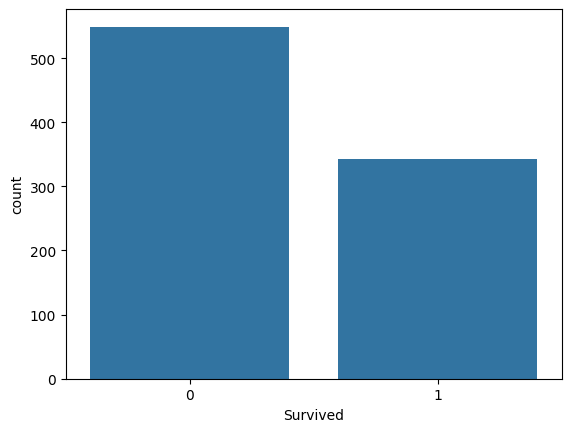

In [6]:
#Number of People suvived
sns.countplot(x='Survived',data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

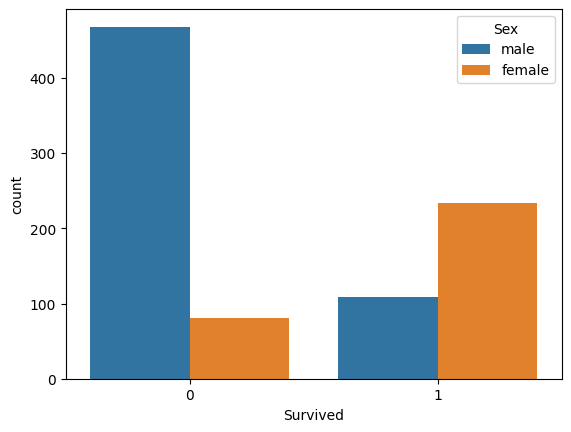

In [7]:
#Male V/s Female
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

In [8]:
#Check if there are any null values
titanic_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

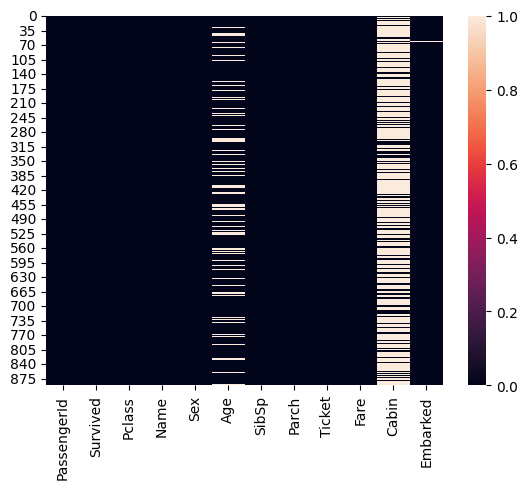

In [9]:
#Vilzualisation
sns.heatmap(titanic_data.isna())

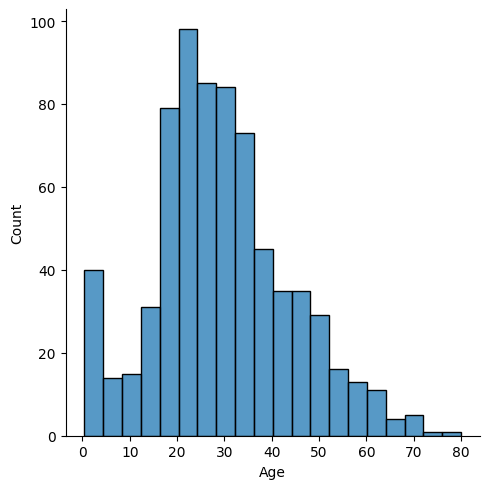

In [10]:
sns.displot(x='Age',data=titanic_data)

In [12]:
#filling the blank ages
mean_age=titanic_data['Age'].mean()
titanic_data['Age'].fillna(mean_age , inplace=True)

#just to check
titanic_data['Age'].isna().sum()

<ipython-input-12-a7f44e8c7219>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(mean_age , inplace=True)


np.int64(0)

In [13]:
#Convert sex coloumn to numbers for our ease
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [14]:
#Add this coloumn of gender in our data set
titanic_data['Gender']=gender

In [15]:
#Droppping the coloumns that are not usefull for plotting :-Name , Sex,Ticket,Embarked

titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)



In [16]:
#Let's check
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Gender
0,1,0,3,22.0,1,0,7.2500,NaN,True
1,2,1,1,38.0,1,0,71.2833,C85,False
2,3,1,3,26.0,0,0,7.9250,NaN,False
3,4,1,1,35.0,1,0,53.1000,C123,False
4,5,0,3,35.0,0,0,8.0500,NaN,True


We have to drop cabin column due very high number of na values.

In [17]:
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']


**DATA MODELLING**

In [18]:
#import train testsplit method
from sklearn.model_selection import train_test_split


In [19]:
#train text split
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size=0.33 , random_state=42)


In [20]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

#Fit Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
#predicting
predict=lr.predict(x_test)


In [22]:
#Printing Confusion Matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted NO','Predicted YES'], index=['Actual NO','Actual YES'])

,Predicted NO,Predicted YES
Actual NO,151,24
Actual YES,38,82


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.77      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295

